In [1]:
import pandas as pd

# Define the file paths for your CSV files
file_paths = ['FinalDataFrame_with_Gender_Predictions_2021.csv', 'FinalDataFrame_with_Gender_Predictions_2022.csv', 'FinalDataFrame_with_Gender_Predictions_2023.csv']

# Create a list to store the DataFrames
dataframes = []

# Read each CSV file into a separate DataFrame
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Now you have three separate DataFrames
df1, df2, df3 = dataframes

/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_87424/1591135381.py:11: DtypeWarning: Columns (7,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_87424/1591135381.py:11: DtypeWarning: Columns (2,7,22,23,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_87424/1591135381.py:11: DtypeWarning: Columns (2,7,22,23,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [2]:
df1.columns

Index(['Covered_Recipient_Type', 'Covered_Recipient_First_Name',
       'Covered_Recipient_Middle_Name', 'Covered_Recipient_Last_Name',
       'Recipient_City', 'Recipient_State', 'Recipient_Country',
       'Recipient_Province', 'Covered_Recipient_Primary_Type_1',
       'Covered_Recipient_Specialty_1',
       'Covered_Recipient_License_State_code1',
       'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
       'Total_Amount_of_Payment_USDollars', 'Date_of_Payment',
       'Number_of_Payments_Included_in_Total_Amount',
       'Form_of_Payment_or_Transfer_of_Value',
       'Nature_of_Payment_or_Transfer_of_Value',
       'Physician_Ownership_Indicator',
       'Third_Party_Payment_Recipient_Indicator', 'Charity_Indicator',
       'Contextual_Information', '

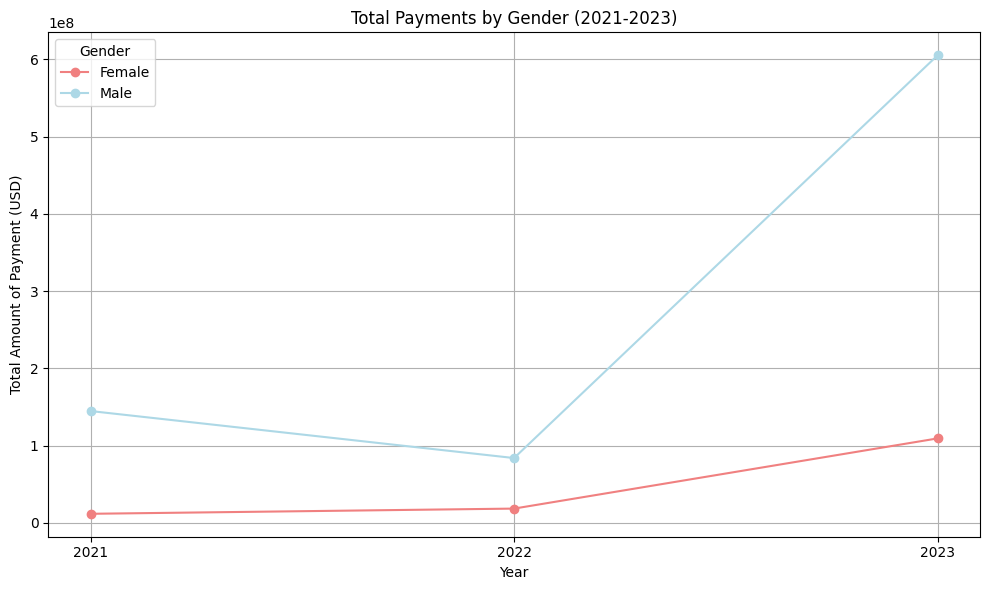

In [5]:
import matplotlib.pyplot as plt

# Assuming your DataFrames are named df2021, df2022, df2023
dataframes = [df1, df2, df3]
years = [2021, 2022, 2023]

# Create a list to store the aggregated data
aggregated_data = []

for df, year in zip(dataframes, years):
    # Group by Gender and sum the Total_Amount_of_Payment_USDollars
    grouped = df.groupby('Gender')['Total_Amount_of_Payment_USDollars'].sum().reset_index()
    grouped['Year'] = year
    aggregated_data.append(grouped)

# Combine all the aggregated data
combined_data = pd.concat(aggregated_data)

# Pivot the data to have years as columns and gender as rows
pivot_data = combined_data.pivot(index='Gender', columns='Year', values='Total_Amount_of_Payment_USDollars')

# Create the line plot
plt.figure(figsize=(10, 6))

# Define colors for each gender
colors = {'M': 'lightblue', 'F': 'lightcoral'}

# Define full names for gender labels
gender_labels = {'M': 'Male', 'F': 'Female'}

# Plot each gender line with specified colors
for gender in pivot_data.index:
    plt.plot(years, pivot_data.loc[gender], marker='o', 
             label=gender_labels.get(gender, gender),  # Use full name if available, otherwise use the code
             color=colors.get(gender, 'gray'))  # Use 'gray' as default if gender not in colors dict

plt.title('Total Payments by Gender (2021-2023)')
plt.xlabel('Year')
plt.ylabel('Total Amount of Payment (USD)')
plt.legend(title='Gender')
plt.grid(True)
plt.xticks(years)
plt.tight_layout()
plt.show()

In [6]:
unique_2021 = df1['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].unique()
print("Unique values for 2021:")
print(unique_2021)
print(f"Number of unique values: {len(unique_2021)}")
print()

# For 2022 data
unique_2022 = df2['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].unique()
print("Unique values for 2022:")
print(unique_2022)
print(f"Number of unique values: {len(unique_2022)}")
print()

# For 2023 data
unique_2023 = df3['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].unique()
print("Unique values for 2023:")
print(unique_2023)
print(f"Number of unique values: {len(unique_2023)}")

Unique values for 2021:
['DePuy Synthes Sales Inc.' 'Johnson & Johnson' 'Alcon Inc.'
 'Baxter Healthcare' 'Boston Scientific Corporation' 'Medtronic, Inc.'
 'Arthrex, Inc.' 'Stryker Corporation' 'Smith+Nephew, Inc.' '3M Company'
 'Siemens Medical Solutions USA, Inc.' 'Zimmer Biomet Holdings, Inc.'
 'Philips Electronics North America Corporation' 'Abbott Laboratories'
 'ENCORE MEDICAL, LP' 'Intuitive Surgical, Inc.' 'Olympus' 'ABBVIE INC.']
Number of unique values: 18

Unique values for 2022:
['Medtronic, Inc.' 'Olympus' 'Baxter Healthcare' 'ABBVIE INC.'
 'Johnson & Johnson' 'DePuy Synthes Sales Inc.'
 'Boston Scientific Corporation' 'Abbott Laboratories' 'Alcon Inc.'
 'Siemens Medical Solutions USA, Inc.'
 'Philips Electronics North America Corporation' 'Arthrex, Inc.'
 'Zimmer Biomet Holdings, Inc.' 'Stryker Corporation' 'LivaNova USA, Inc.'
 'Smith+Nephew, Inc.' '3M Company' 'Intuitive Surgical, Inc.'
 'ENCORE MEDICAL, LP']
Number of unique values: 19

Unique values for 2023:
['Baxte

In [9]:
# Get unique values for each year
unique_2021 = set(df1['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].unique())
unique_2022 = set(df2['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].unique())
unique_2023 = set(df3['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].unique())

# Find the intersection of all three sets
common_across_all_years = unique_2021.intersection(unique_2022, unique_2023)

# Print results
print(f"Number of unique values common across all three years: {len(common_across_all_years)}")

# If you want to see the common values:
print("\nCommon values across all three years:")
for value in sorted(common_across_all_years):
    print(value)

# Additional analysis
print(f"\nTotal unique values in 2021: {len(unique_2021)}")
print(f"Total unique values in 2022: {len(unique_2022)}")
print(f"Total unique values in 2023: {len(unique_2023)}")

# Pairwise comparisons
print(f"\nCommon between 2021 and 2022: {len(unique_2021.intersection(unique_2022))}")
print(f"Common between 2022 and 2023: {len(unique_2022.intersection(unique_2023))}")
print(f"Common between 2021 and 2023: {len(unique_2021.intersection(unique_2023))}")

# Values unique to each year
print(f"\nValues unique to 2021: {len(unique_2021 - unique_2022 - unique_2023)}")
print(f"Values unique to 2022: {len(unique_2022 - unique_2021 - unique_2023)}")
print(f"Values unique to 2023: {len(unique_2023 - unique_2021 - unique_2022)}")

Number of unique values common across all three years: 18

Common values across all three years:
3M Company
ABBVIE INC.
Abbott Laboratories
Alcon Inc.
Arthrex, Inc.
Baxter Healthcare
Boston Scientific Corporation
DePuy Synthes Sales Inc.
ENCORE MEDICAL, LP
Intuitive Surgical, Inc.
Johnson & Johnson
Medtronic, Inc.
Olympus
Philips Electronics North America Corporation
Siemens Medical Solutions USA, Inc.
Smith+Nephew, Inc.
Stryker Corporation
Zimmer Biomet Holdings, Inc.

Total unique values in 2021: 18
Total unique values in 2022: 19
Total unique values in 2023: 20

Common between 2021 and 2022: 18
Common between 2022 and 2023: 19
Common between 2021 and 2023: 18

Values unique to 2021: 0
Values unique to 2022: 0
Values unique to 2023: 1


In [13]:
# Assuming you have three DataFrames: df2021, df2022, df2023

# List of companies
companies = [
    '3M Company', 'ABBVIE INC.', 'Abbott Laboratories', 'Alcon Inc.', 'Arthrex, Inc.',
    'Baxter Healthcare', 'Boston Scientific Corporation', 'DePuy Synthes Sales Inc.',
    'ENCORE MEDICAL, LP', 'Intuitive Surgical, Inc.', 'Johnson & Johnson', 'Medtronic, Inc.',
    'Olympus', 'Philips Electronics North America Corporation', 'Siemens Medical Solutions USA, Inc.',
    'Smith+Nephew, Inc.', 'Stryker Corporation', 'Zimmer Biomet Holdings, Inc.'
]

# Define colors for each gender
colors = {'M': 'lightblue', 'F': 'lightcoral'}

# Define full names for gender labels
gender_labels = {'M': 'Male', 'F': 'Female'}

# Years
years = [2021, 2022, 2023]

for company in companies:
    # Create a list to store the aggregated data for this company
    company_data = []

    for df, year in zip([df1, df2, df3], years):
        # Filter data for the current company
        company_df = df[df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] == company]
        
        # Group by Gender and sum the Total_Amount_of_Payment_USDollars
        grouped = company_df.groupby('Gender')['Total_Amount_of_Payment_USDollars'].sum().reset_index()
        grouped['Year'] = year
        company_data.append(grouped)

    # Combine all the aggregated data for this company
    combined_data = pd.concat(company_data)

    # Pivot the data to have years as columns and gender as rows
    pivot_data = combined_data.pivot(index='Gender', columns='Year', values='Total_Amount_of_Payment_USDollars')

    # Create the line plot
    plt.figure(figsize=(10, 6))

    # Plot each gender line with specified colors
    for gender in pivot_data.index:
        plt.plot(years, pivot_data.loc[gender], marker='o', 
                 label=gender_labels.get(gender, gender),
                 color=colors.get(gender, 'gray'))

    plt.title(f'{company} - Total Payments by Gender (2021-2023)')
    plt.xlabel('Year')
    plt.ylabel('Total Amount of Payment (USD)')
    plt.legend(title='Gender')
    plt.grid(True)
    plt.xticks(years)
    
    # Use scientific notation for y-axis if numbers are large
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
    plt.tight_layout()
    plt.savefig(f'payments/{company}_payments.png')
    plt.close()

print("All graphs have been generated and saved.")

All graphs have been generated and saved.


In [14]:
import pandas as pd
from collections import Counter

# Assuming you have three DataFrames: df1, df2, df3

companies = [
    '3M Company', 'ABBVIE INC.', 'Abbott Laboratories', 'Alcon Inc.', 'Arthrex, Inc.',
    'Baxter Healthcare', 'Boston Scientific Corporation', 'DePuy Synthes Sales Inc.',
    'ENCORE MEDICAL, LP', 'Intuitive Surgical, Inc.', 'Johnson & Johnson', 'Medtronic, Inc.',
    'Olympus', 'Philips Electronics North America Corporation', 'Siemens Medical Solutions USA, Inc.',
    'Smith+Nephew, Inc.', 'Stryker Corporation', 'Zimmer Biomet Holdings, Inc.'
]

def get_unique_values(df, company):
    return set(df[df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] == company]['Nature_of_Payment_or_Transfer_of_Value'].unique())

results = {}

for company in companies:
    unique_2021 = get_unique_values(df1, company)
    unique_2022 = get_unique_values(df2, company)
    unique_2023 = get_unique_values(df3, company)
    
    all_unique = unique_2021.union(unique_2022, unique_2023)
    common_all_years = unique_2021.intersection(unique_2022, unique_2023)
    
    value_counts = Counter()
    value_counts.update({value: 1 for value in unique_2021})
    value_counts.update({value: 1 for value in unique_2022})
    value_counts.update({value: 1 for value in unique_2023})
    
    results[company] = {
        'unique_values': list(all_unique),
        'common_values': list(common_all_years),
        'value_counts': dict(value_counts)
    }

# Print results
for company, data in results.items():
    print(f"\n{company}:")
    print(f"Total unique values: {len(data['unique_values'])}")
    print(f"Values common across all three years: {len(data['common_values'])}")
    print("Occurrence of values across years:")
    for value, count in data['value_counts'].items():
        print(f"  {value}: {count} year(s)")
    print("\nUnique values:")
    print(", ".join(data['unique_values']))
    print("\nCommon values across all years:")
    print(", ".join(data['common_values']))
    print("-" * 80)


3M Company:
Total unique values: 7
Values common across all three years: 5
Occurrence of values across years:
  Compensation for serving as faculty or as a speaker for a medical education program: 3 year(s)
  Travel and Lodging: 3 year(s)
  Food and Beverage: 3 year(s)
  Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program: 3 year(s)
  Consulting Fee: 3 year(s)
  Royalty or License: 2 year(s)
  Debt forgiveness: 1 year(s)

Unique values:
Compensation for serving as faculty or as a speaker for a medical education program, Travel and Lodging, Food and Beverage, Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program, Royalty or License, Debt forgiveness, Consulting Fee

Common values across all years:
Compensation for serving as faculty or as a speaker for a medical education program, Travel and Lodging, 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Ensure the 'payments' directory exists
if not os.path.exists('payments'):
    os.makedirs('payments')

# Assuming you have three DataFrames: df1, df2, df3 for years 2021, 2022, 2023 respectively
companies = [
    '3M Company', 'ABBVIE INC.', 'Abbott Laboratories', 'Alcon Inc.', 'Arthrex, Inc.',
    'Baxter Healthcare', 'Boston Scientific Corporation', 'DePuy Synthes Sales Inc.',
    'ENCORE MEDICAL, LP', 'Intuitive Surgical, Inc.', 'Johnson & Johnson', 'Medtronic, Inc.',
    'Olympus', 'Philips Electronics North America Corporation', 'Siemens Medical Solutions USA, Inc.',
    'Smith+Nephew, Inc.', 'Stryker Corporation', 'Zimmer Biomet Holdings, Inc.'
]

def get_common_natures(df1, df2, df3, company):
    natures_2021 = set(df1[df1['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] == company]['Nature_of_Payment_or_Transfer_of_Value'].unique())
    natures_2022 = set(df2[df2['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] == company]['Nature_of_Payment_or_Transfer_of_Value'].unique())
    natures_2023 = set(df3[df3['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] == company]['Nature_of_Payment_or_Transfer_of_Value'].unique())
    return list(natures_2021.intersection(natures_2022, natures_2023))

def get_total_amount(df, company, nature):
    return df[(df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] == company) & 
              (df['Nature_of_Payment_or_Transfer_of_Value'] == nature)]['Total_Amount_of_Payment_USDollars'].sum()

years = [2021, 2022, 2023]

for company in companies:
    common_natures = get_common_natures(df1, df2, df3, company)
    
    plt.figure(figsize=(12, 6))
    
    for nature in common_natures:
        amounts = [
            get_total_amount(df1, company, nature),
            get_total_amount(df2, company, nature),
            get_total_amount(df3, company, nature)
        ]
        
        plt.plot(years, amounts, marker='o', label=nature)
    
    plt.title(f'{company} - Total Payments by Nature (2021-2023)')
    plt.xlabel('Year')
    plt.ylabel('Total Amount of Payment (USD)')
    plt.legend(title='Nature of Payment', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    
    # Set x-axis ticks to show only 2021, 2022, and 2023
    plt.xticks(years)
    
    plt.tight_layout()
    
    # Save the figure
    plt.savefig(f'payments/{company}_nature_payments.png', bbox_inches='tight')
    plt.close()

print("All graphs have been generated and saved in the 'payments' folder.")

/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_87424/3440645998.py:53: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


All graphs have been generated and saved in the 'payments' folder.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Ensure the 'payments3' directory exists
if not os.path.exists('payments3'):
    os.makedirs('payments3')

# Assuming you have three DataFrames: df1, df2, df3 for years 2021, 2022, 2023 respectively
companies = [
    '3M Company', 'ABBVIE INC.', 'Abbott Laboratories', 'Alcon Inc.', 'Arthrex, Inc.',
    'Baxter Healthcare', 'Boston Scientific Corporation', 'DePuy Synthes Sales Inc.',
    'ENCORE MEDICAL, LP', 'Intuitive Surgical, Inc.', 'Johnson & Johnson', 'Medtronic, Inc.',
    'Olympus', 'Philips Electronics North America Corporation', 'Siemens Medical Solutions USA, Inc.',
    'Smith+Nephew, Inc.', 'Stryker Corporation', 'Zimmer Biomet Holdings, Inc.'
]

def get_common_natures(df1, df2, df3, company):
    natures_2021 = set(df1[df1['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] == company]['Nature_of_Payment_or_Transfer_of_Value'].unique())
    natures_2022 = set(df2[df2['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] == company]['Nature_of_Payment_or_Transfer_of_Value'].unique())
    natures_2023 = set(df3[df3['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] == company]['Nature_of_Payment_or_Transfer_of_Value'].unique())
    return list(natures_2021.intersection(natures_2022, natures_2023))

def get_total_amount(df, company, nature, gender):
    return df[(df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] == company) & 
              (df['Nature_of_Payment_or_Transfer_of_Value'] == nature) &
              (df['Gender'] == gender)]['Total_Amount_of_Payment_USDollars'].sum()

years = [2021, 2022, 2023]
genders = ['M', 'F']
colors = {'M': 'lightblue', 'F': 'lightcoral'}
gender_labels = {'M': 'Male', 'F': 'Female'}

for company in companies:
    # Create a folder for each company
    company_folder = os.path.join('payments3', company.replace(' ', '_').replace(',', ''))
    if not os.path.exists(company_folder):
        os.makedirs(company_folder)

    common_natures = get_common_natures(df1, df2, df3, company)
    
    for nature in common_natures:
        plt.figure(figsize=(10, 6))
        
        for gender in genders:
            amounts = [
                get_total_amount(df1, company, nature, gender),
                get_total_amount(df2, company, nature, gender),
                get_total_amount(df3, company, nature, gender)
            ]
            
            plt.plot(years, amounts, marker='o', label=gender_labels[gender], color=colors[gender])
        
        plt.title(f'{company}\n{nature}\nTotal Payments by Gender (2021-2023)')
        plt.xlabel('Year')
        plt.ylabel('Total Amount of Payment (USD)')
        plt.legend(title='Gender')
        plt.grid(True)
        plt.xticks(years)
        
        # Use scientific notation for y-axis if numbers are large
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
        plt.tight_layout()
        
        # Save the figure
        safe_nature = nature.replace('/', '_').replace(' ', '_')
        plt.savefig(os.path.join(company_folder, f'{safe_nature}.png'))
        plt.close()

print("All graphs have been generated and saved in the 'payments3' folder.")

All graphs have been generated and saved in the 'payments3' folder.
